## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/EDA capstone project hotel booking analysis/Hotel Bookings.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.shape

(119390, 32)

In [ ]:
booking_by_hotel_type=df["hotel"].value_counts()
print(booking_by_hotel_type)

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


Text(0, 0.5, 'number of bookings')

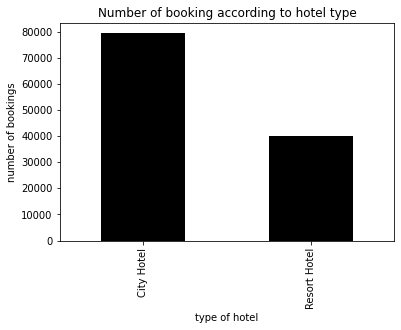

In [ ]:
# plotting a bar chart to compare number of bookings made in each type of hotel
booking_by_hotel_type.plot(kind='bar',color='black')
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Number of booking according to hotel type')
plt.xlabel('type of hotel')
plt.ylabel('number of bookings')


People prefer City Hotel than a Resort Hotel by far.

In [10]:
booking_by_time_of_the_year = df.groupby(['arrival_date_month','arrival_date_year'])['arrival_date_month'].count().unstack()
# booking_by_time_of_the_year.fillna(0,inplace=True)
booking_by_time_of_the_year=booking_by_time_of_the_year.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
booking_by_time_of_the_year


arrival_date_year,2015,2016,2017
arrival_date_month,,,
January,NaN,2248.0,3681.0
February,NaN,3891.0,4177.0
March,NaN,4824.0,4970.0
April,NaN,5428.0,5661.0
May,NaN,5478.0,6313.0
June,NaN,5292.0,5647.0
July,2776.0,4572.0,5313.0
August,3889.0,5063.0,4925.0
September,5114.0,5394.0,NaN


Text(0, 0.5, 'number of bookings')

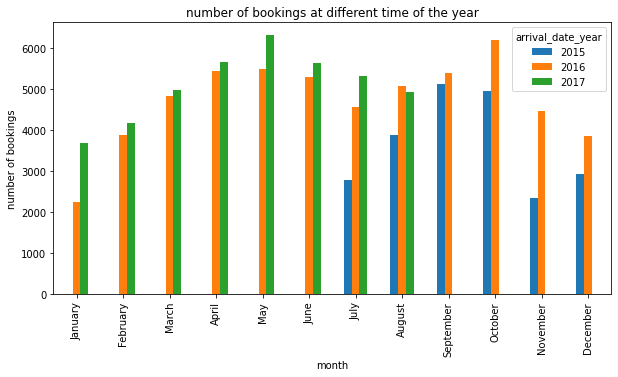

In [ ]:
booking_by_time_of_the_year.plot(kind='bar')
plt.title('number of bookings at different time of the year')
plt.xlabel('month')
plt.ylabel('number of bookings')


Text(0, 0.5, 'number of bookings')

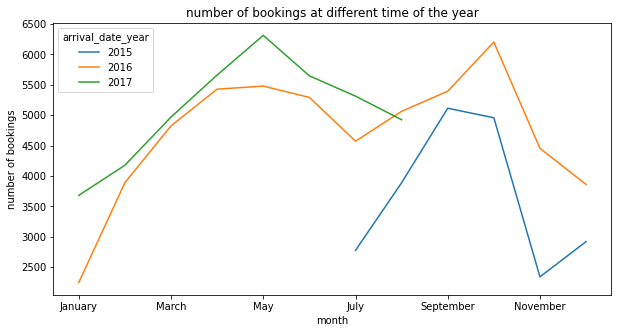

In [ ]:
booking_by_time_of_the_year.plot()
plt.title('number of bookings at different time of the year')
plt.xlabel('month')
plt.ylabel('number of bookings')



*   Number of bookings at the same time of the year has been on a rise with each passing year.
*   Each year sees a high number of booking around may and october.



In [ ]:
booking_by_month =df['arrival_date_month'].value_counts()
booking_by_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

This doesn't provide a clear insight as data for some months are missing.

Text(0, 0.5, 'Number of bookings')

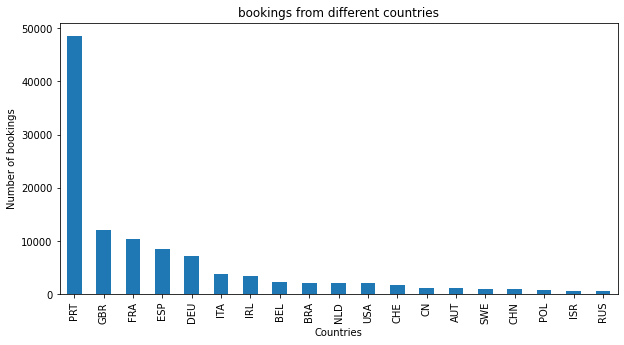

In [40]:
top_20_countries=df['country'].value_counts().sort_values(ascending=False)[:19]
top_20_countries.plot(kind='bar')
plt.title('bookings from different countries')
plt.xlabel('Countries')
plt.ylabel('Number of bookings')



The hotels had disproportionately high number of bookings from Portugal followed by Great Britain,France,Spain and Germany.

In [20]:
room_type_by_month=df.groupby(['arrival_date_month','reserved_room_type'])['reserved_room_type'].count().unstack().fillna(0)
room_type_by_month=room_type_by_month.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
room_type_by_month

reserved_room_type,A,B,C,D,E,F,G,H,L,P
arrival_date_month,,,,,,,,,,
January,4644.0,80.0,16.0,657.0,291.0,128.0,87.0,26.0,0.0,0.0
February,6091.0,87.0,44.0,1098.0,405.0,177.0,127.0,38.0,0.0,1.0
March,7114.0,93.0,40.0,1626.0,560.0,191.0,146.0,24.0,0.0,0.0
April,7727.0,90.0,58.0,2005.0,702.0,292.0,171.0,40.0,0.0,4.0
May,8311.0,52.0,61.0,2203.0,648.0,262.0,210.0,44.0,0.0,0.0
June,7895.0,55.0,112.0,1821.0,526.0,261.0,198.0,71.0,0.0,0.0
July,8197.0,153.0,213.0,2385.0,902.0,364.0,335.0,108.0,4.0,0.0
August,8920.0,173.0,267.0,2657.0,902.0,487.0,357.0,110.0,2.0,2.0
September,8080.0,63.0,43.0,1422.0,461.0,231.0,163.0,45.0,0.0,0.0


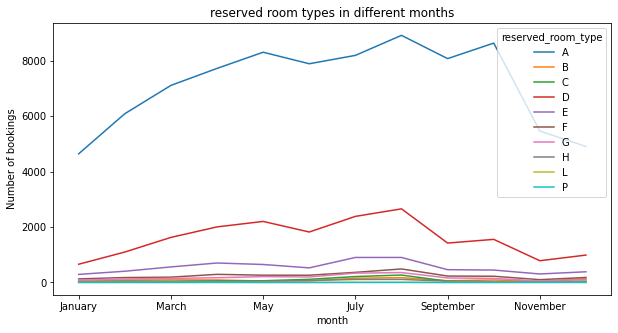

In [47]:
room_type_by_month.plot()
plt.title('reserved room types in different months')
plt.xlabel('month')
plt.ylabel('Number of bookings')
plt.rcParams['figure.figsize'] = (10, 5)





The room type A is prefered by most number of people followed by type D and type E.Each of these types follows almost similar contours.

In [52]:
df['adults'].value_counts().reset_index().rename(columns={'index':'adults','adults':'bookings'})


,adults,bookings
0,2,89680
1,1,23027
2,3,6202
3,0,403
4,4,62
5,26,5
6,27,2
7,20,2
8,5,2
9,55,1


Around 75% of the bookings consist of two adults.

In [60]:
df.groupby('arrival_date_day_of_month')['hotel'].count().reset_index().rename(columns={'index':'arrival_date_day_of_month','hotel':'bookings'})

,arrival_date_day_of_month,bookings
0,1,3626
1,2,4055
2,3,3855
3,4,3763
4,5,4317
5,6,3833
6,7,3665
7,8,3921
8,9,4096
9,10,3575


Text(0, 0.5, 'nights of stay')

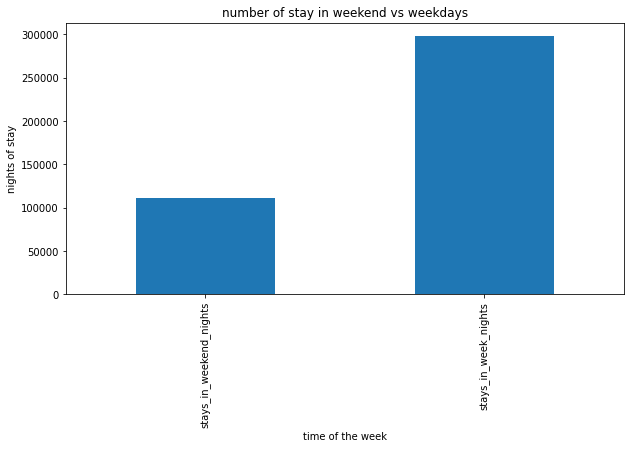

In [65]:
week_and_weekend_stay=df[['stays_in_weekend_nights','stays_in_week_nights']].sum()
week_and_weekend_stay.plot(kind='bar')
plt.title('number of stay in weekend vs weekdays')
plt.xlabel('time of the week')
plt.ylabel('nights of stay')


In [5]:
df['total_persons']=df['adults']+df['children']+df['babies']

In [67]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_persons
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [73]:
df.groupby('country')['total_persons'].sum().reset_index().sort_values('total_persons',ascending=False,ignore_index=True)

,country,total_persons
0,PRT,90027.0
1,GBR,24568.0
2,FRA,21579.0
3,ESP,18153.0
4,DEU,14198.0
...,...,...
172,SLE,2.0
173,MDG,2.0
174,PLW,2.0
175,GUY,1.0


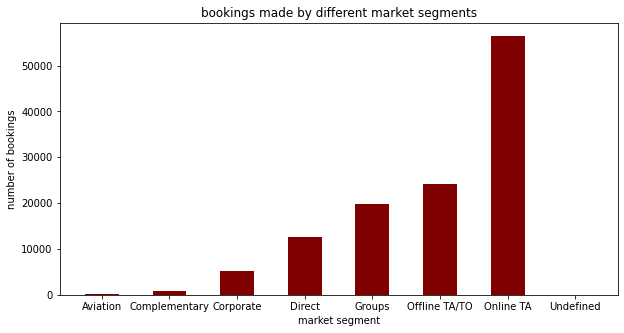

In [22]:
bookings_by_market_segment=df.groupby('market_segment')['hotel'].count().reset_index().rename(columns={'hotel':'bookings'})
bookings_by_market_segment
plt.bar(bookings_by_market_segment['market_segment'],bookings_by_market_segment['bookings'],width=0.5,color='maroon')
plt.title('bookings made by different market segments')
plt.xlabel('market segment')
plt.ylabel('number of bookings')
plt.rcParams['figure.figsize'] = (10, 5)




*   Most of the bookings where made by onlline travel agencies
*   Offline travel agencies,groups and direct bookings comes in second,third and fourth position respectively in terms of number of bookings made



Text(0, 0.5, 'number of bookings')

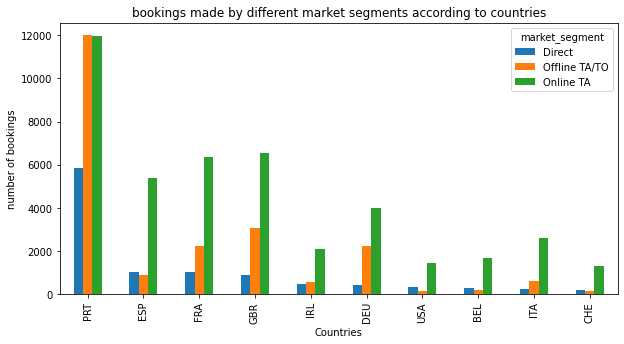

In [39]:
market_segment_by_country=df.groupby(['country','market_segment'])['market_segment'].count().unstack().sort_values('Direct',ascending=False).head(10)
market_segment_by_country[['Direct','Offline TA/TO','Online TA']].plot(kind='bar')
plt.title('bookings made by different market segments according to countries')
plt.xlabel('Countries')
plt.ylabel('number of bookings')
